Step 1: Importing necessary libraries

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


Step 2: Load the dataset

In [28]:
df = pd.read_csv(r'C:\Users\91822\OneDrive\Desktop\Oasis Infobyte\Oasis-Infobyte\Project 3\car data.csv')  # Change this to your actual file path


Step 3: Data exploration (checking the dataset)

In [29]:
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Step 4: Handle Missing Values

In [30]:
# Create separate imputers for numerical and categorical data
num_imputer = SimpleImputer(strategy='mean')  # For numeric columns
cat_imputer = SimpleImputer(strategy='most_frequent')  # For categorical columns

# Define numeric and categorical columns
numeric_cols = ['Year', 'Present_Price', 'Driven_kms', 'Owner']
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission']

# Impute missing values in numeric columns
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# Impute missing values in categorical columns
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Check if missing values are handled
print(df.isnull().sum())


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


Step 5: Encoding Categorical Features

In [31]:
#Encoding categorical features using OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the categorical columns
encoded_features = encoder.fit_transform(df[['Fuel_Type', 'Selling_type', 'Transmission']])

# Convert the encoded features into a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

# Drop the original categorical columns and concatenate the encoded columns with the rest of the data
df = df.drop(['Fuel_Type', 'Selling_type', 'Transmission', 'Car_Name'], axis=1)  # Dropping 'Car_Name' as it may not contribute much to the model
df = pd.concat([df, encoded_df], axis=1)

# Update X (features) with the newly encoded features
X = df.drop('Selling_Price', axis=1)  # 'Selling_Price' is the target variable
y = df['Selling_Price']


Step 6: Split the Dataset into Training and Testing Sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 7: Train the Model

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Step 8: Make Predictions

In [34]:
y_pred = model.predict(X_test)


Step 9: Evaluate the Model

In [35]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')


Mean Absolute Error (MAE): 1.216374019332988
Mean Squared Error (MSE): 3.481349830510787
Root Mean Squared Error (RMSE): 1.8658375680939612
R-squared: 0.8488707839193601


Step 10: Visualizing the Results

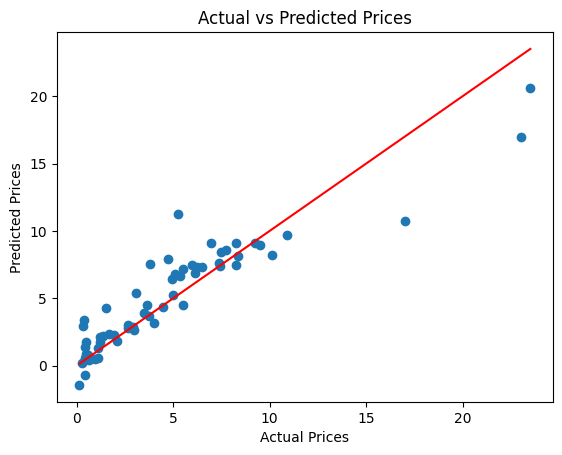

In [36]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
